In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset = pd.read_csv("AppleData.csv")

In [3]:
dataset.head(5)

,Date,WIKI/AAPL - Open,WIKI/AAPL - High,WIKI/AAPL - Low,WIKI/AAPL - Close,WIKI/AAPL - Volume,WIKI/AAPL - Ex-Dividend,WIKI/AAPL - Split Ratio,WIKI/AAPL - Adj. Open,WIKI/AAPL - Adj. High,WIKI/AAPL - Adj. Low,WIKI/AAPL - Adj. Close,WIKI/AAPL - Adj. Volume
0,2000-01-03,104.87,112.50,101.69,111.94,4783900.0,0.0,1.0,3.369314,3.614454,3.267146,3.596463,133949200.0
1,2000-01-04,108.25,110.62,101.19,102.50,4574800.0,0.0,1.0,3.477908,3.554053,3.251081,3.293170,128094400.0
2,2000-01-05,103.75,110.56,103.00,104.00,6949300.0,0.0,1.0,3.333330,3.552125,3.309234,3.341362,194580400.0
3,2000-01-06,106.12,107.00,95.00,95.00,6856900.0,0.0,1.0,3.409475,3.437748,3.052206,3.052206,191993200.0
4,2000-01-07,96.50,101.00,95.50,99.50,4113700.0,0.0,1.0,3.100399,3.244977,3.068270,3.196784,115183600.0


In [4]:
dataset = np.array(dataset)

In [5]:
#OHLC
OHLC = dataset[:, 1:5].astype(float)
OHLC = OHLC.mean(axis=1)
OHLC = OHLC.reshape(-1, 1)
scalerOHLC = MinMaxScaler()
OHLC = scalerOHLC.fit_transform(OHLC)
OHLC


array([[0.13748043],
       [0.13441651],
       [0.13396273],
       ...,
       [0.22358584],
       [0.22801109],
       [0.22935791]])

In [6]:
#AdjustedOHLC
AdjustedOHLC = dataset[:, 8:12].astype(float)
AdjustedOHLC = AdjustedOHLC.mean(axis=1)
AdjustedOHLC = AdjustedOHLC.reshape(-1, 1)
scalerAdjustedOHLC = MinMaxScaler()
AdjustedOHLC = scalerAdjustedOHLC.fit_transform(AdjustedOHLC)
AdjustedOHLC


array([[0.01452666],
       [0.01415106],
       [0.01409543],
       ...,
       [0.9208937 ],
       [0.93777876],
       [0.94291769]])

In [7]:
#HLC
HLC = dataset[:, 2:5].astype(float)
HLC = HLC.mean(axis=1)
HLC = HLC.reshape(-1, 1)
scalerHLC = MinMaxScaler()
HLC = scalerHLC.fit_transform(HLC)
HLC


array([[0.13889682],
       [0.1331772 ],
       [0.13474985],
       ...,
       [0.22293462],
       [0.22898813],
       [0.22806873]])

In [8]:
#AdjustedHLC
AdjustedHLC = dataset[:, 9:12].astype(float)
AdjustedHLC = AdjustedHLC.mean(axis=1)
AdjustedHLC = AdjustedHLC.reshape(-1, 1)
scalerAdjustedHLC = MinMaxScaler()
AdjustedHLC = scalerAdjustedHLC.fit_transform(AdjustedHLC)
AdjustedHLC


array([[0.0147031 ],
       [0.01400219],
       [0.01419491],
       ...,
       [0.9178307 ],
       [0.94092005],
       [0.93741328]])

In [9]:
dataset = pd.DataFrame(OHLC)
dataset.head(5)

,0
0,0.137480
1,0.134417
2,0.133963
3,0.127359
4,0.123504


In [10]:
dataset = np.array(dataset)
step_size = 1
X = dataset[:-step_size]
y = dataset[step_size:]
print(X.shape)
print(y.shape)
train_length = int(X.shape[0] * 0.8)
test_length = X.shape[0] - train_length
X_train = X[:train_length].reshape(-1, 1, 1)
X_test = X[train_length:].reshape(-1, 1, 1)
y_train = y[:train_length]
y_test = y[train_length:]
X_train.shape

(4584, 1)
(4584, 1)


(3667, 1, 1)

In [11]:
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential

regressor = Sequential()
regressor.add(LSTM(units=16, input_shape=(None, 1), return_sequences=True))
regressor.add(LSTM(units=32, activation='relu'))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, batch_size=32, epochs=100)


C:\Users\win10\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/100
3667/3667 [==============================] - 5s 1ms/step - loss: 0.0903
Epoch 2/100
3667/3667 [==============================] - 1s 233us/step - loss: 0.0280 0s - 
Epoch 3/100
3667/3667 [==============================] - 1s 234us/step - loss: 0.0014
Epoch 4/100
3667/3667 [==============================] - 1s 236us/step - loss: 3.9861e-04
Epoch 5/100
3667/3667 [==============================] - 1s 239us/step - loss: 2.9385e-04
Epoch 6/100
3667/3667 [==============================] - 1s 233us/step - loss: 2.6499e-04
Epoch 7/100
3667/3667 [==============================] - 1s 235us/step - loss: 2.6091e-04
Epoch 8/100
3667/3667 [==============================] - 1s 231us/step - loss: 2.4735e-04
Epoch 9/100
3667/3667 [==============================] - 1s 242us/step - loss: 2.4079e-04
Epoch 10/100
3667/3667 [==============================] - 1s 236us/step - loss: 2.3888e-04
Epoch 11/100
3667/3667 [==============================] - 1s 242us/step - loss: 2.3266e-04
Epoch 12/100
366

3667/3667 [==============================] - 1s 241us/step - loss: 2.2902e-04
Epoch 91/100
3667/3667 [==============================] - 1s 250us/step - loss: 2.2895e-04 0s
Epoch 92/100
3667/3667 [==============================] - 1s 246us/step - loss: 2.2216e-04
Epoch 93/100
3667/3667 [==============================] - 1s 244us/step - loss: 2.3372e-04
Epoch 94/100
3667/3667 [==============================] - 1s 242us/step - loss: 2.3059e-04 0s - loss: 2.3541e-0
Epoch 95/100
3667/3667 [==============================] - 1s 241us/step - loss: 2.2518e-04 0s - loss: 2.5478e
Epoch 96/100
3667/3667 [==============================] - 1s 249us/step - loss: 2.2722e-04
Epoch 97/100
3667/3667 [==============================] - 1s 247us/step - loss: 2.2811e-04
Epoch 98/100
3667/3667 [==============================] - 1s 240us/step - loss: 2.3026e-04
Epoch 99/100
3667/3667 [==============================] - 1s 248us/step - loss: 2.2961e-04
Epoch 100/100
3667/3667 [==============================] - 1

In [12]:
y_predict = scalerOHLC.inverse_transform(regressor.predict(X_test))
y_test = scalerOHLC.inverse_transform(y_test)
from sklearn.metrics import r2_score
print(r2_score(y_test, y_predict))
np.c_[y_predict, y_test]

0.9954902171468866


array([[ 95.37575531,  95.9275    ],
       [ 95.69168091,  95.13      ],
       [ 94.88556671,  94.975     ],
       ...,
       [171.02653503, 167.0475    ],
       [168.15261841, 170.095     ],
       [171.0880127 , 171.0225    ]])

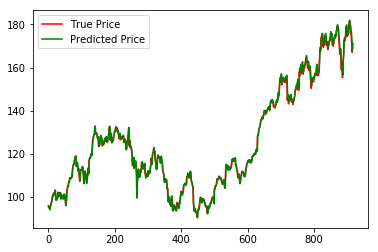

In [14]:
import matplotlib.pyplot as plt
plt.plot(y_test, color = 'red', label = 'True Price')
plt.plot(y_predict, color = 'green', label = 'Predicted Price')
plt.legend()
plt.show()